In [11]:
from qiskit import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-10-16 15:28:36,682: Credentials are already in use. The existing account in the session will be replaced.


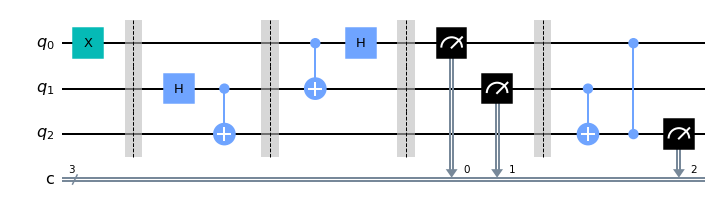

In [13]:
circuit = QuantumCircuit(3,3)
%matplotlib inline
circuit.x(0)
circuit.barrier()
circuit.h(1)
circuit.cx(1,2)
circuit.barrier()
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.measure([0, 1], [0, 1])
circuit.barrier()
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.measure([2], [2])
circuit.draw(output='mpl')


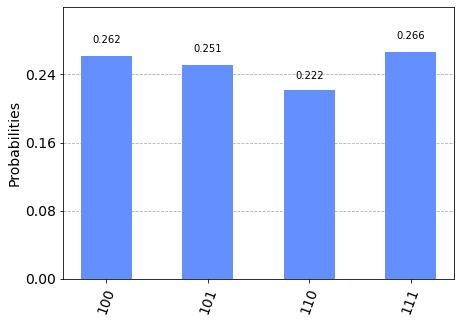

In [21]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [16]:
print(circuit.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg c[3];
x q[0];
barrier q[0],q[1],q[2];
h q[1];
cx q[1],q[2];
barrier q[0],q[1],q[2];
cx q[0],q[1];
h q[0];
barrier q[0],q[1],q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];
barrier q[0],q[1],q[2];
cx q[1],q[2];
cz q[0],q[2];
measure q[2] -> c[2];



/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


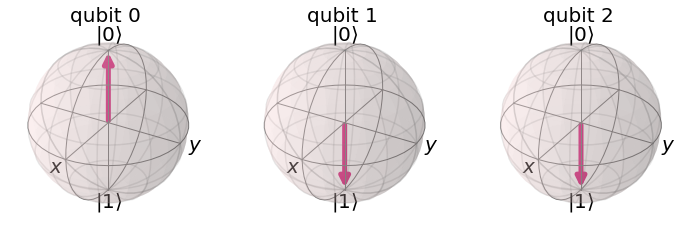

In [18]:
statevector_simulator = Aer.get_backend('statevector_simulator')
result=execute(circuit,statevector_simulator).result()
statevector_results=result.get_statevector(circuit)
plot_bloch_multivector(statevector_results)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


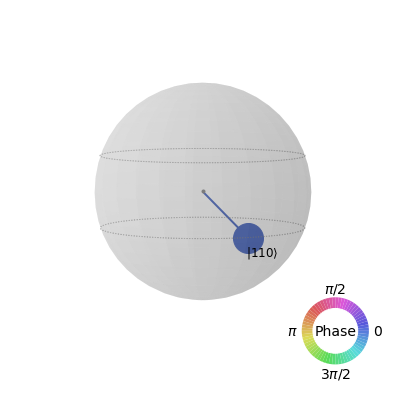

In [19]:
plot_state_qsphere(statevector_results)